# AI-Powered Marketing Programme
## A Program by IIM Calcutta and TalentSprint
### Assignment : Multiple Linear Regression 

## Learning Objectives

   
  At the end of the experiment, you will be able to understand:
    
  * Data normalization
  * Multiple Linear Regression

### Dataset Description



The datset consist of the following attributes.
1. Id
2. Profit
3. Online
4. Age
5. Inc
6. Tenure
7. District

### Task

In this experiment, we have to train a regression model that predicts profit based on customer attributes and find its coefficient and intercept.





## Information

Linear regression is perhaps one of the most well known and well understood algorithms in statistics and machine learning. So, before knowing what is linear regression, let us get ourselves accustomed to regression. Regression is a method of modelling a target value based on independent predictors. This method is mostly used for forecasting and finding out cause and effect relationship between variables. Regression techniques mostly differ based on the number of independent variables and the type of relationship between the independent and dependent variables.

Furthermore, Simple linear regression is a type of regression analysis where the number of independent variables is one and there is a linear relationship between the independent(x) and dependent(y) variable. So, in this assignment we will learn to apply Linear Regression on a dataset.

### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "P21L01E_test " #@param {type:"string"}

In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9809876540" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
from warnings import filterwarnings
filterwarnings('ignore')

ipython = get_ipython()
  
notebook= "LinearRegression" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch") 

    ipython.magic("sx wget !wget https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/CustomerProfit_Regression.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa.iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError 
    else: 
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError 
    else: 
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully



### Import required libraries and packages

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#### Loading the dataset

In [ ]:
dataset = pd.read_csv('/content/CustomerProfit_Regression.csv')

#### Dealing with missing values

Here, we will replace the NA values with the mean of the dataset.

In [ ]:
dataset = dataset.fillna(dataset.mean())

Fetching all the columns excluding 'Id' because it has no significance in prediction.

In [ ]:
data = dataset.values[:, 1:-1]

#### Feature Sclaing (optional)

Before getting into Standardization, let us first understand the concept of Scaling.

Scaling of Features is an essential step before training the algorithms with the given dataset.

The dataset contains features whose numerical value ranges might differ hugely. The diversity in the range of features might impact the algorithm training adversely. Therefore, it might lead to a biased outcome of predictions in terms of misclassification. Thus, it is necessary to normalize each of the features(numerical).

Moreover, Normalization typically means rescale the values into a range of [0,1] or [-1,1]. After normalization, the mean and the variance of a particular feature will be 0 and 1 respectively.


In [ ]:
# Creating an instance of standard scaler
scaler = StandardScaler()
# fitting the data
scaler.fit(data)

StandardScaler()

In [ ]:
# transforming the scaled data
data_scaled = scaler.transform(data)
y, X = data_scaled[:, 0], data_scaled[:, 1:]

Now, let us split the data into train and test set.

In [ ]:
# Splitting the dataset using "test_size = 0.0.33" into 67:33 ratio with 67% data as training data and 33% data as test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Linear Regression

Linear regression is one of the easiest and most popular Machine Learning algorithms. It is a statistical method that is used for predictive analysis. Linear regression makes predictions for continuous/real or numeric variables such as sales, salary, age, product price, etc.

Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression. Since linear regression shows the linear relationship, which means it finds how the value of the dependent variable is changing according to the value of the independent variable.

The linear regression model provides a sloped straight line representing the relationship between the variables. Consider the below image:

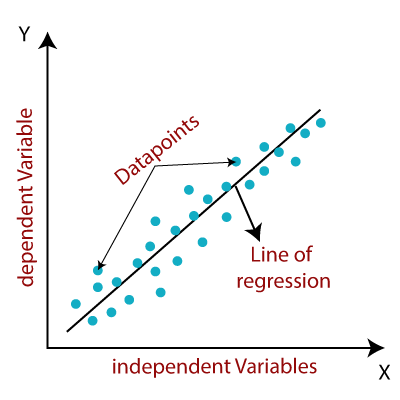

Linear Regression in Machine Learning
Mathematically, we can represent a linear regression as:

$y= a_{0}+a_{1}x+ ε$

Here,

$Y$= Dependent Variable (Target Variable)
$X$= Independent Variable (predictor Variable)
$a_{0}$= intercept of the line (Gives an additional degree of freedom)
$a_{1}$ = Linear regression coefficient (scale factor to each input value).
$ε$ = random error

The values for x and y variables are training datasets for Linear Regression model representation.

#### Types of Linear Regression

Linear regression can be further divided into two types of the algorithm:

**Simple Linear Regression**

If a single independent variable is used to predict the value of a numerical dependent variable, then such a Linear Regression algorithm is called Simple Linear Regression.

**Multiple Linear regression**

If more than one independent variable is used to predict the value of a numerical dependent variable, then such a Linear Regression algorithm is called Multiple Linear Regression.

Now, let us use `LinearRegression` from sklearn package to implement linear regression algorithm. 

In [ ]:
reg = LinearRegression(normalize=True)
# Fitting the training data
reg =  reg.fit(X_train, y_train)

Let us find the coefficient and intercept.

**coef_** : array, shape(n_features,) or (n_targets, n_features) It is used to estimate the coefficients for the linear regression problem. It would be a 2D array of shape (n_targets, n_features) if multiple targets are passed during fit.

**intercept_** : Also known as the y intercept, it is simply the value at which the fitted line crosses the y-axis.

In [ ]:
reg.coef_, reg.intercept_

(array([0.01567878, 0.07836568, 0.12453125, 0.16444287]),
 0.0052532247553549166)

### Please answer the questions below:




In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]
